In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import os

from os.path import join
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
data_dir = '/content/drive/MyDrive/EX4/'

In [185]:
hyundai_data_path = join(data_dir, 'hyundai.csv')
kakao_data_path = join(data_dir, 'kakao.csv')
tyt_data_path = join(data_dir, 'TM.csv')
ab_data_path = join(data_dir, 'blizzard.csv')

In [186]:
df1 = pd.read_csv(hyundai_data_path)
df2 = pd.read_csv(kakao_data_path)
df3 = pd.read_csv(tyt_data_path)
df4 = pd.read_csv(ab_data_path)
df1.head() # Hyundai Motors

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-28,204000.0,204000.0,200500.0,201500.0,196670.562500,719631
1,2021-09-29,197500.0,202000.0,197500.0,201500.0,196670.562500,934463
2,2021-09-30,200000.0,201000.0,199000.0,200000.0,195206.515625,594666
3,2021-10-01,198000.0,199000.0,192000.0,193500.0,188862.296875,1182422
4,2021-10-05,191000.0,195000.0,189000.0,193500.0,188862.296875,1056472


In [130]:
df2.head() # Kakao

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-28,121386.117188,122393.468750,118364.054688,118364.054688,118309.187500,3420430
1,2021-09-29,115845.671875,118364.054688,115342.000000,117356.703125,117302.304688,3149191
2,2021-09-30,115845.671875,121386.117188,115342.000000,118867.734375,118812.632813,4615972
3,2021-10-01,118867.734375,120882.445313,116853.023438,117356.703125,117302.304688,2312100
4,2021-10-05,115342.000000,116853.023438,111312.578125,111816.257813,111764.429688,4849404


In [150]:
df3.head() # Toyota

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-27,185.080002,186.860001,185.009995,186.520004,186.520004,221600
2021-09-28,186.089996,186.399994,184.149994,184.850006,184.850006,197600
2021-09-29,185.130005,187.449997,183.779999,185.449997,185.449997,238600
2021-09-30,180.679993,181.539993,177.750000,177.750000,177.750000,403400
2021-10-01,178.110001,178.259995,176.419998,177.619995,177.619995,241800


In [187]:
df4.head() # Activision Blizzard

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-27,75.029999,75.949997,73.690002,75.080002,74.636360,6517900
1,2021-09-28,74.660004,77.080002,74.660004,76.330002,75.878967,11157200
2,2021-09-29,76.529999,78.930000,76.500000,77.379997,76.922760,9700800
3,2021-09-30,77.559998,78.410004,77.000000,77.389999,76.932701,7537900
4,2021-10-01,78.059998,79.040001,77.199997,78.529999,78.065971,5861300


# 현대자동차

In [94]:
#Time Series(시계열 데이터) 생성
df1 = pd.read_csv(hyundai_data_path, index_col='Date', parse_dates=True)
ts = df1['Close']

ts.head() # 현대자동차 시계열

Date
2021-09-28    201500.0
2021-09-29    201500.0
2021-09-30    200000.0
2021-10-01    193500.0
2021-10-05    193500.0
Name: Close, dtype: float64

In [95]:
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [96]:
def augmented_dickey_fuller_test(timeseries):
    #statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')
    
    #adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [97]:
#일정 시간 내 구간 통계치(Rolling Statistics) 시각화하는 함수
def plot_rolling_statistics(timeseries, window=12):
    rolmean = timeseries.rolling(window=window).mean()  #이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    #이동표준편차 시계열

     #원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='orange', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [98]:
ts_log = np.log(ts) # 액티비전 블리자드 로그변환

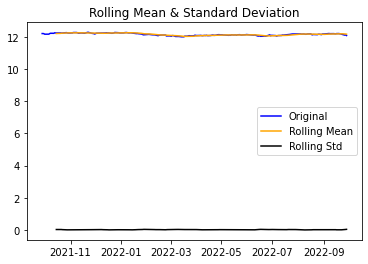

Results of Dickey-Fuller Test:
Test Statistic                  -1.784973
p-value                          0.387947
#Lags Used                       0.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


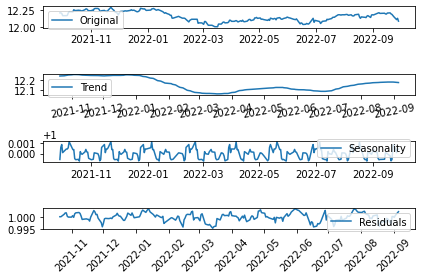

In [99]:
#정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) #30일 주기
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) #30일 주기

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.xticks(rotation = 10)
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.xticks(rotation = 45)
plt.legend(loc='best')
plt.tight_layout()

In [100]:
#Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.784973
p-value                          0.387947
#Lags Used                       0.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


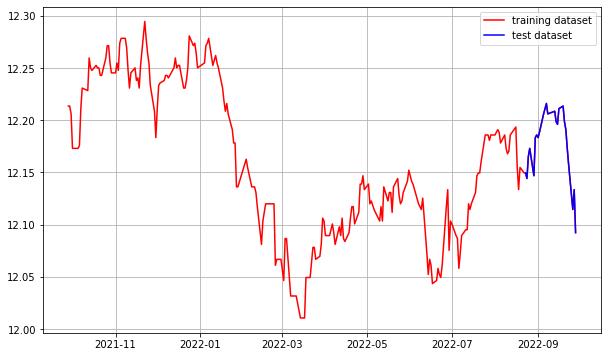

In [101]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [102]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) #모수는 이전 그래프를 참고
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  221
Model:                ARIMA(14, 1, 0)   Log Likelihood                 597.574
Date:                Thu, 29 Sep 2022   AIC                          -1165.148
Time:                        02:43:07   BIC                          -1114.244
Sample:                             0   HQIC                         -1144.591
                                - 221                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0225      0.078      0.290      0.772      -0.130       0.175
ar.L2         -0.1754      0.073     -2.406      0.016      -0.318      -0.032
ar.L3          0.0311      0.077      0.403      0.6

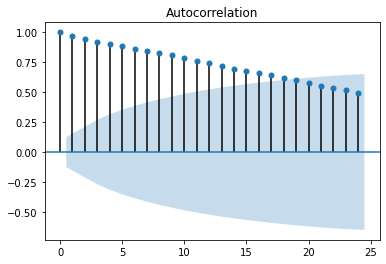

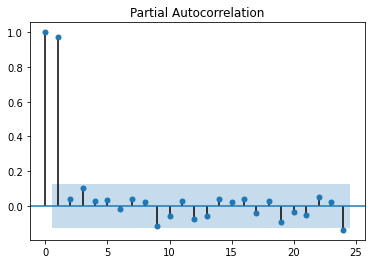

In [103]:
#ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   #ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  #PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.241109e+01
p-value                        4.341984e-23
#Lags Used                     1.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.241109e+01
p-value                        4.341984e-23
#Lags Used                     1.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64


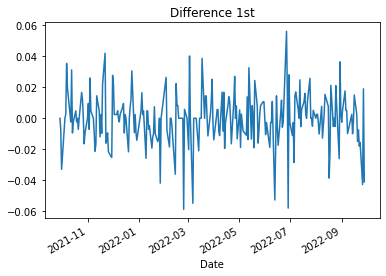

In [104]:
#차분 안정성 확인 -> d 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

#2차 차분 구하기

augmented_dickey_fuller_test(diff_1)

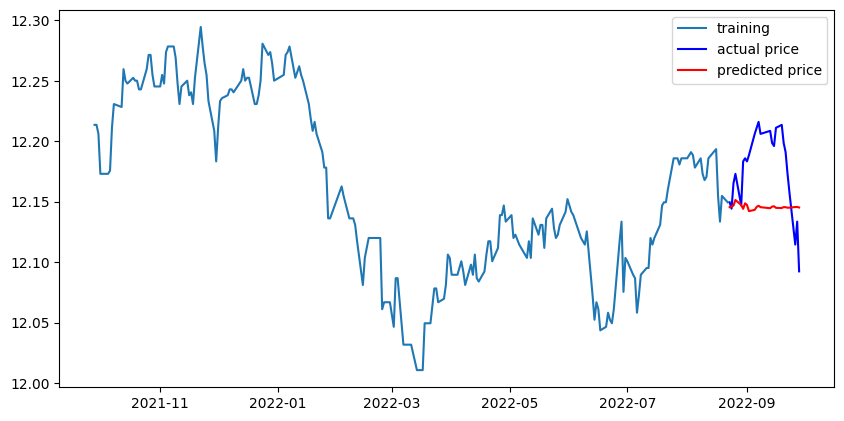

In [105]:
#Forecast : 결과가 fc에 담깁니다.
fc = fitted_m.forecast(len(test_data), alpha=0.05)  #95% conf
fc = np.array(fc)
#Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   #예측결과

#Plot0
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  77634589.22344702
MAE:  7699.239866456037
RMSE:  8811.049269153307
MAPE: 3.91%


#카카오

In [113]:
df2 = pd.read_csv(kakao_data_path, index_col='Date', parse_dates=True)
ts1 = df2['Close']

ts1.head() # 카카오 시계열

Date
2021-09-28    118364.054688
2021-09-29    117356.703125
2021-09-30    118867.734375
2021-10-01    117356.703125
2021-10-05    111816.257813
Name: Close, dtype: float64

In [114]:
ts1 = ts1.interpolate(method='time')
ts1[ts1.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [115]:
def augmented_dickey_fuller_test(timeseries):
    #statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')
    
    #adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [116]:
#일정 시간 내 구간 통계치(Rolling Statistics) 시각화하는 함수
def plot_rolling_statistics(timeseries, window=12):
    rolmean = timeseries.rolling(window=window).mean()  #이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    #이동표준편차 시계열

     #원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='orange', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [117]:
ts1_log = np.log(ts1) # 카카오 로그변환

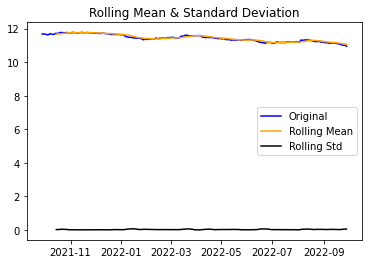

Results of Dickey-Fuller Test:
Test Statistic                   0.183315
p-value                          0.971310
#Lags Used                       3.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


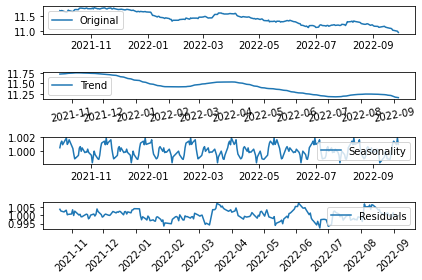

In [118]:
#정성적 그래프 분석
plot_rolling_statistics(ts1_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts1_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts1_log, model='multiplicative', period = 30) #30일 주기
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts1_log, model='multiplicative', period = 30) #30일 주기

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.xticks(rotation = 10)
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.xticks(rotation = 45)
plt.legend(loc='best')
plt.tight_layout()

In [119]:
#Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(ts1_log)

Results of Dickey-Fuller Test:
Test Statistic                   0.183315
p-value                          0.971310
#Lags Used                       3.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


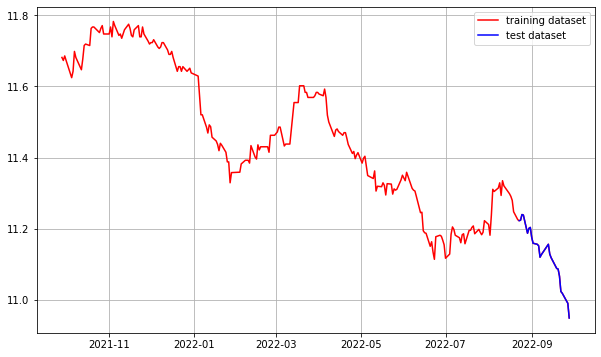

In [120]:
train_data, test_data = ts1_log[:int(len(ts1_log)*0.9)], ts1_log[int(len(ts1_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts1_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [121]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) #모수는 이전 그래프를 참고
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  221
Model:                ARIMA(14, 1, 0)   Log Likelihood                 513.854
Date:                Thu, 29 Sep 2022   AIC                           -997.708
Time:                        02:43:38   BIC                           -946.804
Sample:                             0   HQIC                          -977.152
                                - 221                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0093      0.083     -0.112      0.911      -0.172       0.154
ar.L2         -0.1238      0.077     -1.603      0.109      -0.275       0.028
ar.L3          0.1743      0.081      2.164      0.0

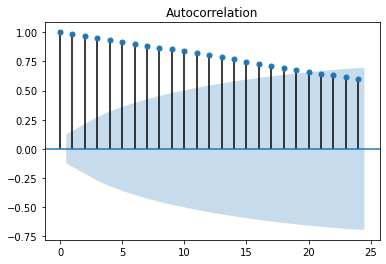

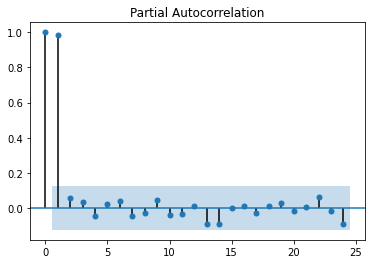

In [122]:
#ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts1_log)   #ACF : Autocorrelation 그래프 그리기
plot_pacf(ts1_log)  #PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -7.908458e+00
p-value                        4.007365e-12
#Lags Used                     2.000000e+00
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.908458e+00
p-value                        4.007365e-12
#Lags Used                     2.000000e+00
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64


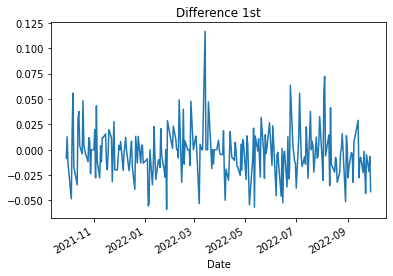

In [124]:
#차분 안정성 확인 -> d 구하기
diff_1 = ts1_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

#2차 차분 구하기

augmented_dickey_fuller_test(diff_1)

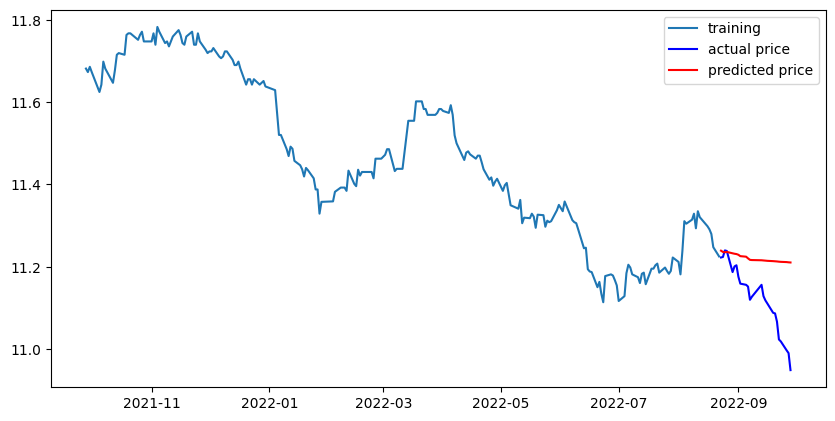

In [125]:
#Forecast : 결과가 fc에 담깁니다.
fc = fitted_m.forecast(len(test_data), alpha=0.05)  #95% conf
fc = np.array(fc)
#Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   #예측결과

#Plot0
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  65979353.13599368
MAE:  6645.005658598726
RMSE:  8122.767578602362
MAPE: 10.38%


#토요타

In [151]:
df3 = pd.read_csv(tyt_data_path, index_col='Date', parse_dates=True)
ts2 = df3['Close']

ts2.head() # 토요타 시계열

Date
2021-09-27    186.520004
2021-09-28    184.850006
2021-09-29    185.449997
2021-09-30    177.750000
2021-10-01    177.619995
Name: Close, dtype: float64

In [152]:
ts2 = ts2.interpolate(method='time')
ts2[ts2.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [153]:
def augmented_dickey_fuller_test(timeseries):
    #statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')
    
    #adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [154]:
#일정 시간 내 구간 통계치(Rolling Statistics) 시각화하는 함수
def plot_rolling_statistics(timeseries, window=12):
    rolmean = timeseries.rolling(window=window).mean()  #이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    #이동표준편차 시계열

     #원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='orange', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [155]:
ts2_log = np.log(ts2) # 토요타 로그변환

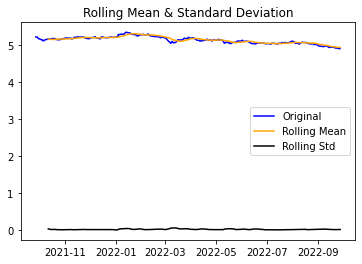

Results of Dickey-Fuller Test:
Test Statistic                  -0.600666
p-value                          0.870831
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


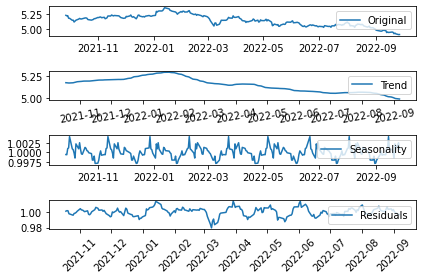

In [156]:
#정성적 그래프 분석
plot_rolling_statistics(ts2_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts2_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts2_log, model='multiplicative', period = 30) #30일 주기
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts2_log, model='multiplicative', period = 30) #30일 주기

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts2_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.xticks(rotation = 10)
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.xticks(rotation = 45)
plt.legend(loc='best')
plt.tight_layout()

In [157]:
#Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(ts2_log)

Results of Dickey-Fuller Test:
Test Statistic                  -0.600666
p-value                          0.870831
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


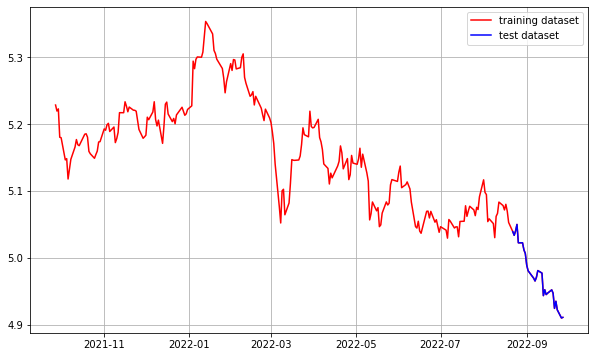

In [158]:
train_data, test_data = ts2_log[:int(len(ts2_log)*0.9)], ts2_log[int(len(ts2_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts2_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [159]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) #모수는 이전 그래프를 참고
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                ARIMA(14, 1, 0)   Log Likelihood                 594.529
Date:                Thu, 29 Sep 2022   AIC                          -1159.057
Time:                        02:45:53   BIC                          -1107.749
Sample:                             0   HQIC                         -1138.351
                                - 227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0300      0.075      0.401      0.688      -0.116       0.176
ar.L2         -0.0240      0.059     -0.405      0.685      -0.140       0.092
ar.L3          0.0391      0.081      0.482      0.6

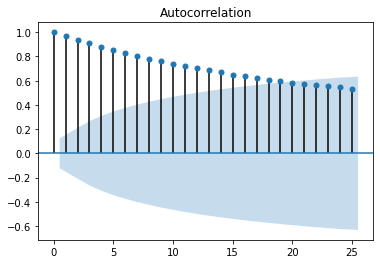

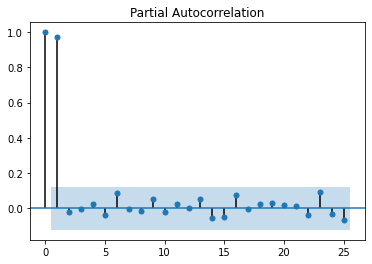

In [160]:
#ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts2_log)   #ACF : Autocorrelation 그래프 그리기
plot_pacf(ts2_log)  #PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.571267e+01
p-value                        1.353526e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.571267e+01
p-value                        1.353526e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64


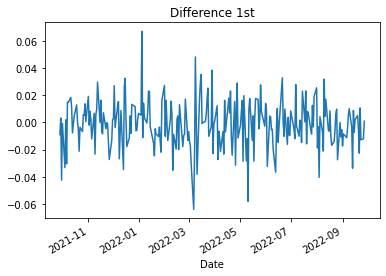

In [161]:
#차분 안정성 확인 -> d 구하기
diff_1 = ts2_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

#2차 차분 구하기

augmented_dickey_fuller_test(diff_1)

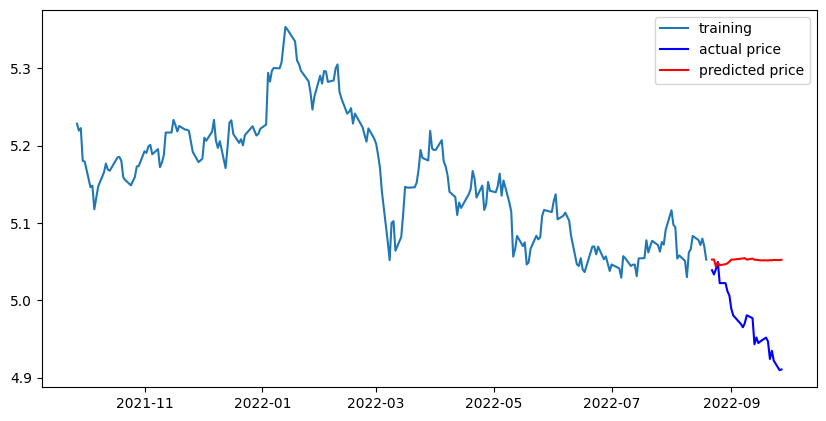

In [163]:
#Forecast : 결과가 fc에 담깁니다.
fc = fitted_m.forecast(len(test_data), alpha=0.05)  #95% conf
fc = np.array(fc)
#Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   #예측결과

#Plot0
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [164]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  169.02105919423943
MAE:  11.410728820312256
RMSE:  13.000809943778096
MAPE: 8.07%


#블리자드

In [188]:
df4 = pd.read_csv(ab_data_path, index_col='Date', parse_dates=True)
ts3 = df4['Close']

ts3.head() # 블리자드 시계열

Date
2021-09-27    75.080002
2021-09-28    76.330002
2021-09-29    77.379997
2021-09-30    77.389999
2021-10-01    78.529999
Name: Close, dtype: float64

In [189]:
ts3 = ts3.interpolate(method='time')
ts3[ts3.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [190]:
def augmented_dickey_fuller_test(timeseries):
    #statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')
    
    #adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [191]:
#일정 시간 내 구간 통계치(Rolling Statistics) 시각화하는 함수
def plot_rolling_statistics(timeseries, window=12):
    rolmean = timeseries.rolling(window=window).mean()  #이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    #이동표준편차 시계열

     #원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='orange', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [192]:
ts3_log = np.log(ts3) # 액티비전 블리자드 로그변환

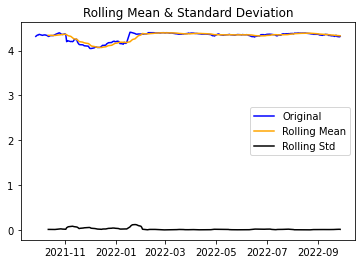

Results of Dickey-Fuller Test:
Test Statistic                  -1.782687
p-value                          0.389090
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


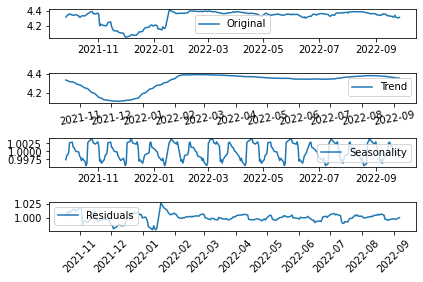

In [193]:
#정성적 그래프 분석
plot_rolling_statistics(ts3_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts3_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts3_log, model='multiplicative', period = 30) #30일 주기
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts3_log, model='multiplicative', period = 30) #30일 주기

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts3_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.xticks(rotation = 10)
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.xticks(rotation = 45)
plt.legend(loc='best')
plt.tight_layout()

In [194]:
#Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(ts3_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.782687
p-value                          0.389090
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


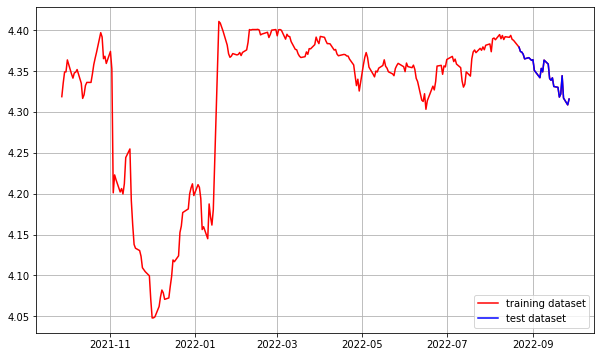

In [195]:
train_data, test_data = ts3_log[:int(len(ts3_log)*0.9)], ts3_log[int(len(ts3_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts3_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [196]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) #모수는 이전 그래프를 참고
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                ARIMA(14, 1, 0)   Log Likelihood                 551.050
Date:                Thu, 29 Sep 2022   AIC                          -1072.101
Time:                        02:51:10   BIC                          -1020.793
Sample:                             0   HQIC                         -1051.395
                                - 227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0788      0.074      1.070      0.285      -0.066       0.223
ar.L2         -0.0273      0.125     -0.219      0.826      -0.271       0.217
ar.L3         -0.0008      0.147     -0.005      0.9

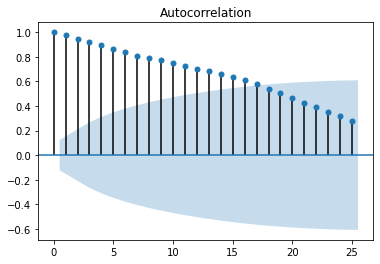

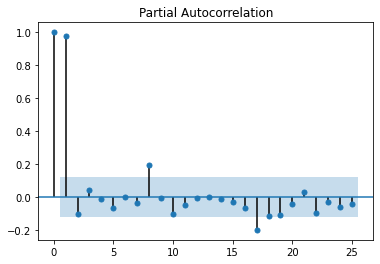

In [197]:
#ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts3_log)   #ACF : Autocorrelation 그래프 그리기
plot_pacf(ts3_log)  #PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.470668e+01
p-value                        2.890077e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.470668e+01
p-value                        2.890077e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64


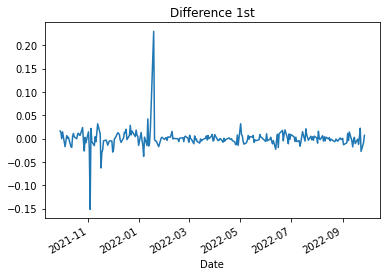

In [198]:
#차분 안정성 확인 -> d 구하기
diff_1 = ts3_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

#2차 차분 구하기

augmented_dickey_fuller_test(diff_1)

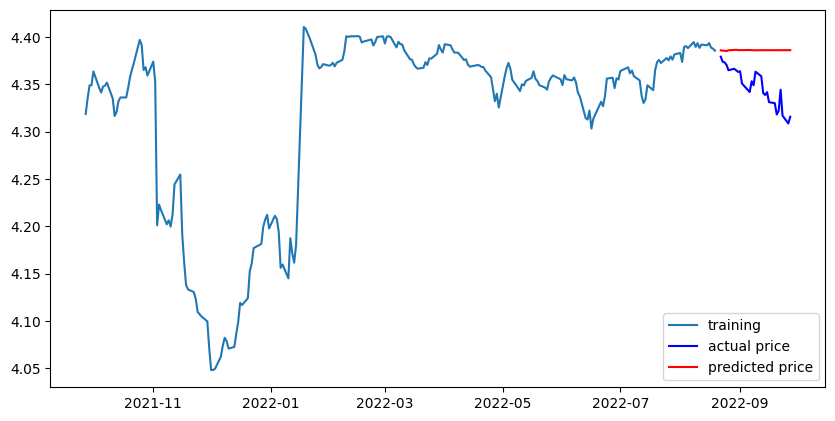

In [199]:
#Forecast : 결과가 fc에 담깁니다.
fc = fitted_m.forecast(len(test_data), alpha=0.05)  #95% conf
fc = np.array(fc)
#Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   #예측결과

#Plot0
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [200]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  11.359651870562617
MAE:  2.989966077325699
RMSE:  3.3704082646710054
MAPE: 3.91%
